# <center>LDA(Linear Discriminant Analysis)

<img src='./lda_1.png' width='700' height='600'>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### When PCA fails ?

(1, 5)

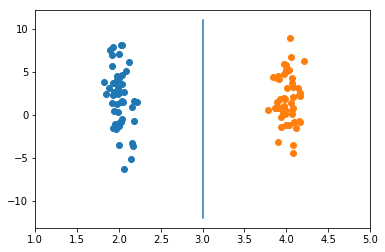

In [2]:
mean = [[2,2],[4,2]]
C = [[0.01,0],[0,10]]
X1 = np.random.multivariate_normal(mean[0],C,size=50)
X2 = np.random.multivariate_normal(mean[1],C,size=50)
X = np.concatenate((X1,X2))
y = np.concatenate((np.zeros(50),np.ones(50)))
plt.scatter(X1[:,0],X1[:,1])
plt.scatter(X2[:,0],X2[:,1])
plt.plot(3*np.ones(24),range(-12,12))
plt.xlim([1,5])

In [3]:
from sklearn.decomposition import PCA
pca = PCA(1).fit(X)
X_transform = pca.transform(X)

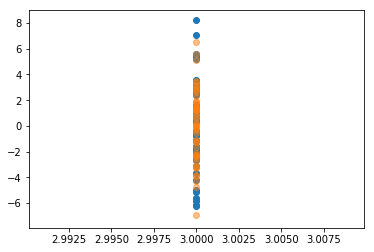

In [42]:
plt.scatter(3*np.ones(50),X_transform[0:50])
plt.scatter(3*np.ones(50),X_transform[50:100],alpha=.5)

#### Q. How to reduce the dimension retaining the class separation?

 For this we use LDA. In contrast to PCA, LDA is “supervised” and computes the directions (“linear discriminants”) that will represent the axes that that maximize the separation between multiple classes.

In LDA, we try to maximise the interclass variance and minimize the intra-class variance. This is an optimisation problem.

(1, 5)

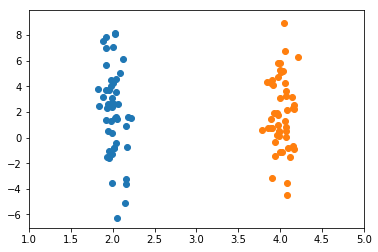

In [5]:
plt.scatter(X1[:,0],X1[:,1])
plt.scatter(X2[:,0],X2[:,1])
plt.xlim([1,5])

#### Clasification with LDA

In [6]:
X = np.concatenate((X1,X2))
y = np.concatenate((np.zeros(50),np.ones(50)))
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=1,solver='eigen').fit(X,y)

In [7]:
X_tranf = lda.transform(X)
X_tranf.shape

(100, 1)

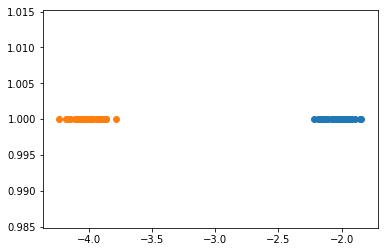

In [8]:
plt.scatter(X_tranf[0:50],np.ones(50))
plt.scatter(X_tranf[50:100],np.ones(50))

#### Example :  Two Class Classification using PCA & LDA

In [9]:
import os
import skimage.io as io
import skimage.color as clr
dir0 = './reception'
dir1 = './igloo'

list0 = os.listdir(dir0)
list1 = os.listdir(dir1)
# list1 = use listdir to list files in dir1

def rgb2gray(rgb):
    
    if len(rgb.shape) == 3:
        r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
        gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
        return gray
    else: 
        return rgb

X0 = []
X1 = []
for i in range(len(list0)):
    temp1 = io.imread(os.path.join(dir0,list0[i]))
    temp = clr.rgb2gray(temp1)
    X0.append(temp)
X_0 = np.asarray(X0,dtype = np.uint8)

for i in range(len(list1)):
    temp1 = io.imread(os.path.join(dir1,list1[i]))
    temp = clr.rgb2gray(temp1)
    X1.append(temp)
X_1 = np.asarray(X1, dtype = np.uint8)

In [10]:
# create a vector of '0' using np.zeros of size = number of samples in X_0 
y_0 = np.zeros([X_0.shape[0],1])

# create a vector of '1' using np.ones of size = number of samples in X_1
y_1 = np.ones([X_1.shape[0],1])



In [11]:
X = np.concatenate([X_0,X_1],axis=0)
y = np.concatenate([y_0,y_1],axis=0)
X.shape

(1000, 256, 256)

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
X_downsampled = []
for i in range(X.shape[0]):
    downsampled_image = np.resize(X[i], [128, 128])
    X_downsampled.append(downsampled_image)
X_downsampled = np.array(X_downsampled)
X_downsampled = X_downsampled.reshape((X_downsampled.shape[0],128*128))
print(X_downsampled.shape)

trainX, testX, trainY, testY = train_test_split(X_downsampled, y, train_size=0.8, random_state=0)
clf = LogisticRegression()
clf.fit(trainX,trainY)

pred= clf.predict(testX)

print("Score for Logistic Regression : {}".format(clf.score(testX,testY)))

(1000, 16384)


/home/gopi/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Score for Logistic Regression : 0.59


In [28]:
X_reshaped = np.reshape(X_downsampled,[X_downsampled.shape[0],-1])
X_reshaped.shape

(1000, 16384)

In [31]:
pca = PCA(n_components=100,random_state=0)
pca.fit(X_reshaped)
transform = pca.transform(X_reshaped)
print("Transformed data shape = ",transform.shape)

Transformed data shape =  (1000, 100)


In [32]:
pca

PCA(copy=True, iterated_power='auto', n_components=100, random_state=0,
  svd_solver='auto', tol=0.0, whiten=False)

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
trainX, testX, trainY, testY = train_test_split(transform, y, train_size=0.8, random_state=0)

clf = LogisticRegression()
clf.fit(trainX,trainY)

pred= clf.predict(testX)

print("Score for Logistic Regression : {}".format(clf.score(testX,testY)))

Score for Logistic Regression : 0.555


/home/gopi/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [17]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_reshaped,y)
transform = lda.transform(X_reshaped)
print("Transformed data shape = ",transform.shape)

/home/gopi/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Transformed data shape =  (1000, 1)


/home/gopi/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [20]:
trainX, testX, trainY, testY = train_test_split(transform, y, train_size=0.8, random_state=0)

clf = LogisticRegression()
clf.fit(trainX,trainY)

pred= clf.predict(testX)

print("Score for Logistic Regression : {}".format(clf.score(testX,testY)))

Score for Logistic Regression : 0.785


/home/gopi/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
